In [1]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

from utils import *

# Filtering

Image filtering refers to the process of modifying or enhancing an image by applying a filter, which is essentially a mathematical operation or algorithm that transforms the pixel values of the image. Filters are typically applied to achieve various effects such as blurring, sharpening, edge detection, noise reduction, and color enhancement.

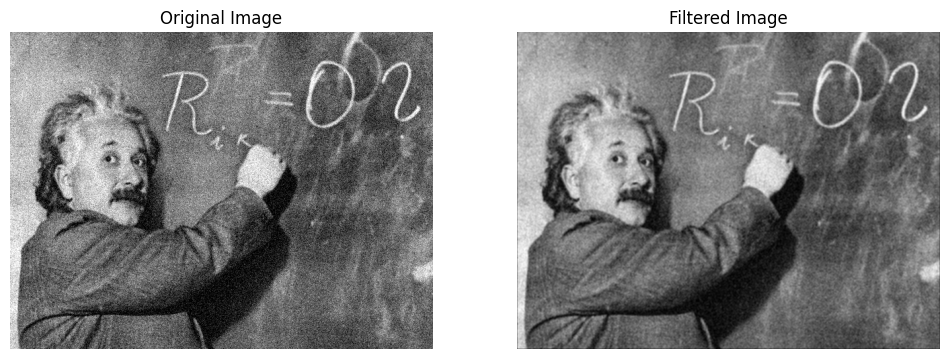

In [2]:
image = cv2.imread('data/images/einstein.jpg', cv2.IMREAD_GRAYSCALE)        # read the image (here we're creating our own filter but OpenCV has its own -- see below)
image = gaussian_noise(image, mean = 5, sigma=25) # adding noise

# Define a 3x3 filter/kernel 
f1 = 1/9 * np.array([[1,1,1],
                     [1,1,1],
                     [1,1,1]])      # box filter (average)
f2 = np.array([[0,0,0],
                     [0,0,1,],
                     [0,0,0]])      # will shift image to the left
f3 = np.array([[0,0,0],
                     [1,0,0,],
                     [0,0,0]])      # will shift the image to the right


# Apply the kernel using convolution
#output = np.zeros(image.shape, dtype = np.float32)
output = cv2.filter2D(src=image, ddepth=cv2.CV_32F, kernel=f1, borderType=cv2.BORDER_CONSTANT)      # apply the box filter to the noisy image
                                                                                                    # ddepth --> our image is in unsigned integer-8 format (1 byte), 
                                                                                                    #            we want the output image (each pixel) to be float not integer
                                                                                                    # borderType --> CONSTANT is 'zero padding'
                                                                                                    #     wrap --> if you want to wrap from the right, it'll copy a pixel from the left
# Display the original and filtered image
show_collage((12,10), 1, 2, **{'images': [image, output], 'titles':['Original Image', 'Filtered Image']})

## Box and Gaussian Filter

(-0.5, 99.5, 99.5, -0.5)

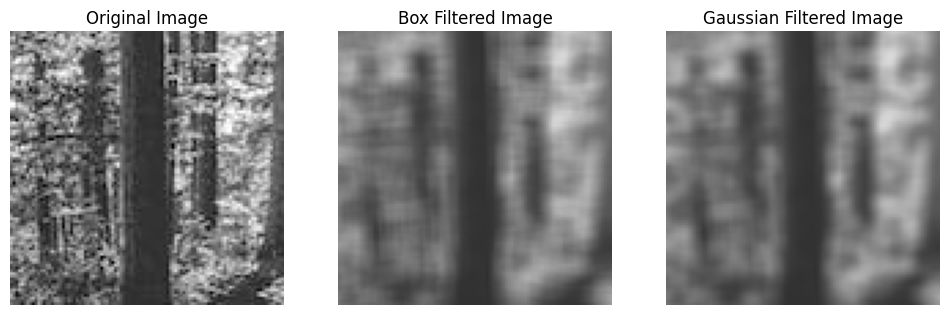

In [10]:
# Read the image
image = cv2.imread('data/images/trees.jpg', cv2.IMREAD_GRAYSCALE)
#image = gaussian_noise(image, sigma=55)

# Apply filters
box_filtered_image = cv2.boxFilter(image, -1, ksize=(7,7), borderType=cv2.BORDER_CONSTANT)
                        # cv2.boxFilter(src, ddepth, ksize, borderType) ^
                        #       src --> image
                        #       ddepth (depth of output img, i.e., data type of pixel vals) --> -1 means set to the same as the input image
                        #       ksize --> kernel size 

gaussian_filtered_image = cv2.GaussianBlur(image, ksize=(7,7), sigmaX = 3, sigmaY = 3, borderType=cv2.BORDER_CONSTANT)
                        # cv2.GaussianBlur(src, ksize, sigmaX, sigmaY, borderType) ^
                        #       sigmaX & sigmaY --> standard deviation of the Gaussian Kernel in the X & Y directions
                        # gaussian filters usually give us a smoother image after blurring

# Display the original and smooth filter
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image[200:300,200:300], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(box_filtered_image[200:300,200:300], cv2.COLOR_BGR2RGB))
plt.title('Box Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(gaussian_filtered_image[200:300,200:300], cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.axis('off')

## Median Filter

(-0.5, 511.5, 511.5, -0.5)

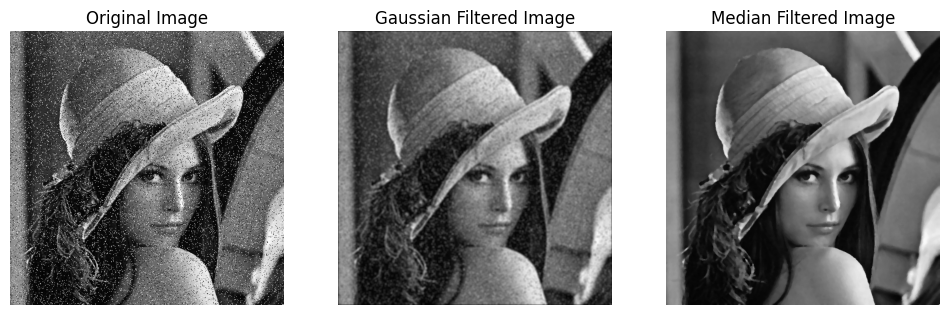

In [19]:
# Read the image
image = cv2.imread('data/images/lena.png', cv2.IMREAD_GRAYSCALE)
image = sp_noise(image, .1)

# Define the size of the box filter kernel (e.g., 3x3)
kernel_size = (6, 6)                    # matrix that defines the weights for each pixel in the neighborhood
                                        # A larger kernel captures more local information but may result in more blurring.
                                        # NOTE: kernel size you pick MUST be odd

# Apply filters
gaussian_filtered_image = cv2.GaussianBlur(image, ksize=(5,5), sigmaX = 2, sigmaY = 2, borderType=cv2.BORDER_CONSTANT)
median_filtered_image = cv2.medianBlur(image, ksize=5)

# Display the original and smooth filter
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtered Image')
plt.axis('off')